0 [0.4936454]
100 [0.57244011]
200 [0.60023018 0.53213183]
300 [0.60023018 0.59075266]
400 [0.60119228 0.60022234 0.55726853]
500 [0.60143292 0.60090354 0.60016857 0.51290084]
600 [0.60143292 0.60090354 0.60016857 0.57611782]
700 [0.60166512 0.60131763 0.60101091 0.60030076 0.5344748 ]
800 [0.60166512 0.60131763 0.60101091 0.60030076 0.59034404]
900 [0.60184525 0.60156123 0.60135875 0.60087691 0.6000057  0.55323579]


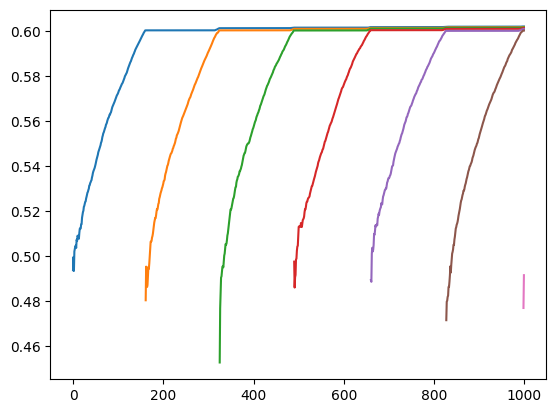

In [26]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


init_step = np.array([0])

won = np.zeros(1, dtype=np.int32)
lst = np.zeros(1, dtype=np.int32)

def play_match(step, i, n):
    step -= init_step[i]
    win_rate = 0.5 + 0.2 * (1 - np.exp(-0.01 * step))

    return np.random.random(size=n) < win_rate

def next_matches(n):
    score = scipy.stats.beta.rvs(won + 1, lst + 1, size=(n, len(won)))
    # print(score, np.argmin(score))
    return np.argmin(score, axis=1)


def observed_win_rate():
    scipy.stats.beta.ppf(q=0.05, a=won + 1, b=lst + 1)


r_history = np.zeros((1, 1000))


for step in range(r_history.shape[1]):
    i = next_matches(1024)

    if play_match(step, i):
        won[i] += 1
    else:
        lst[i] += 1

    r = scipy.stats.beta.ppf(q=0.1, a=won + 1, b=lst + 1)
    r_history[:, step] = r

    if step % 100 == 0:
        print(step, r)

    if np.all(r > 0.6):
        won = np.concatenate([won, [0]], dtype=np.int32)
        lst = np.concatenate([lst, [0]], dtype=np.int32)
        init_step = np.concatenate([init_step, [step + 1]], dtype=np.int32)
        r_history = np.concatenate([r_history, np.zeros((1, r_history.shape[1]))])

for i in range(r_history.shape[0]):
    x = np.arange(r_history.shape[1])
    x = x[r_history[i] != 0]
    plt.plot(x, r_history[i, x])

plt.show()